### Machine Learning in Healthcare

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

##### Section 1: Loading and Understanding the dataset

In [74]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error as MAE

In [75]:
#to load the dataset
diabetes_df = pd.read_csv("healthcare_2015.csv") 

In [76]:
#to analyze the dataset
print(diabetes_df.shape) #to show the size of the dataset (number of rows and columns)
print(diabetes_df.columns) #to show the type and number of columns

(441456, 330)
Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)


At this point we have 441,456 records and 330 columns. Each record contains an individual's BRFSS survey responses.

In [102]:
#to display the first 10 rows of the dataset
pd.set_option('display.max_columns', 500)
diabetes_df.head(10) 

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

##### Section 2: Selecting the predictor variables (Feature Selection)

In [77]:
#selecting specific columns
df_selected = diabetes_df[['DIABETE3', #responsevariable 
                           '_RFHYPE5', 'TOLDHI2', #highBP_chol
                           '_BMI5CAT','_SMOKER3', #bmi_smoker
                           'CVDSTRK3', '_MICHD', #stroke_CHD
                           '_TOTINDA','_RFDRHV5', #phy_alco
                           '_FRTLT1', '_VEGLT1', #fruit_veg
                           'HLTHPLN1', 'MEDCOST', 'CHECKUP1', #healthcov_moneyprob_freqcheckup
                           'GENHLTH', 'PHYSHLTH','MENTHLTH', 'ADDEPEV2',  #gen_phy_mental_depression
                           'SEX', '_RACE', '_AGEG5YR', 'EDUCA', 'INCOME2', 'MARITAL', 'EMPLOY1']] #demographics

In [78]:
#Rename the columns to make them more readable
df_selected = df_selected.rename(columns = {'DIABETE3': 'Diabetes',
                                            '_RFHYPE5': 'HighBP',
                                            'TOLDHI2': 'HighChol',
                                            '_BMI5CAT':'BMI', 
                                            '_SMOKER3':'Smoker', 
                                            'CVDSTRK3':'Stroke',
                                            '_MICHD' : 'CHD',
                                            '_TOTINDA':'PhysicalActivity',
                                            '_RFDRHV5':'AlcoConsump', 
                                            '_FRTLT1':'Fruits',
                                            '_VEGLT1':"Veggies", 
                                            'HLTHPLN1':'AnyHealthcare',
                                            'MEDCOST':'NoDocbcCost', 
                                            'CHECKUP1':'Freqcheckup',
                                            'GENHLTH': 'GeneralHlth',
                                            'PHYSHLTH':'PhysicalHlth',
                                            'MENTHLTH':'MentalHlth',
                                            'ADDEPEV2':'Depression',
                                            'SEX':'Sex',
                                            '_RACE':'Race',
                                            '_AGEG5YR':'Age',
                                            'EDUCA':'Education',
                                            'INCOME2':'Income',
                                            'MARITAL':'MaritalStatus',
                                            'EMPLOY1':'EmployStatus'})

In [79]:
print(df_selected.shape) #to show the size of the dataset (number of rows and columns)
print(df_selected.columns)

(441456, 25)
Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'CHD',
       'PhysicalActivity', 'AlcoConsump', 'Fruits', 'Veggies', 'AnyHealthcare',
       'NoDocbcCost', 'Freqcheckup', 'GeneralHlth', 'PhysicalHlth',
       'MentalHlth', 'Depression', 'Sex', 'Race', 'Age', 'Education', 'Income',
       'MaritalStatus', 'EmployStatus'],
      dtype='object')


In [80]:
df_selected.head(10) 

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,CHD,PhysicalActivity,AlcoConsump,Fruits,Veggies,AnyHealthcare,NoDocbcCost,Freqcheckup,GeneralHlth,PhysicalHlth,MentalHlth,Depression,Sex,Race,Age,Education,Income,MaritalStatus,EmployStatus
0,3.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,5.0,15.0,18.0,1.0,2.0,1.0,9.0,4.0,3.0,1.0,8.0
1,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,3.0,88.0,88.0,2.0,2.0,1.0,7.0,6.0,1.0,2.0,3.0
2,3.0,1.0,1.0,2.0,9.0,1.0,NaN,9.0,9.0,9.0,9.0,1.0,2.0,1.0,4.0,15.0,88.0,2.0,2.0,1.0,11.0,4.0,99.0,2.0,7.0
3,3.0,2.0,1.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,1.0,9.0,4.0,8.0,1.0,8.0
4,3.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,5.0,20.0,88.0,2.0,2.0,1.0,9.0,5.0,77.0,1.0,8.0
5,3.0,2.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,2.0,1.0,11.0,3.0,6.0,3.0,2.0
6,3.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,88.0,3.0,2.0,2.0,7.0,11.0,5.0,4.0,3.0,7.0
7,3.0,2.0,1.0,4.0,3.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,88.0,2.0,1.0,1.0,13.0,3.0,3.0,1.0,3.0
8,3.0,1.0,NaN,1.0,4.0,2.0,2.0,1.0,1.0,9.0,9.0,1.0,2.0,1.0,5.0,77.0,88.0,2.0,2.0,1.0,13.0,3.0,77.0,3.0,5.0
9,3.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,88.0,2.0,1.0,1.0,10.0,6.0,8.0,1.0,7.0


In [81]:
df_selected.dtypes 

Diabetes            float64
HighBP              float64
HighChol            float64
BMI                 float64
Smoker              float64
Stroke              float64
CHD                 float64
PhysicalActivity    float64
AlcoConsump         float64
Fruits              float64
Veggies             float64
AnyHealthcare       float64
NoDocbcCost         float64
Freqcheckup         float64
GeneralHlth         float64
PhysicalHlth        float64
MentalHlth          float64
Depression          float64
Sex                 float64
Race                float64
Age                 float64
Education           float64
Income              float64
MaritalStatus       float64
EmployStatus        float64
dtype: object

In [82]:
df_selected.describe() 

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,CHD,PhysicalActivity,AlcoConsump,Fruits,Veggies,AnyHealthcare,NoDocbcCost,Freqcheckup,GeneralHlth,PhysicalHlth,MentalHlth,Depression,Sex,Race,Age,Education,Income,MaritalStatus,EmployStatus
count,441449.000000,441456.000000,382302.000000,405058.000000,441456.000000,441456.000000,437514.000000,441456.000000,441456.000000,441456.000000,441456.000000,441456.000000,441455.000000,441455.000000,441454.000000,441455.000000,441456.000000,441456.000000,441456.000000,441456.000000,441456.000000,441456.000000,438155.000000,441456.000000,441456.000000
mean,2.757888,1.428410,1.630876,2.938461,3.549056,1.973880,1.911699,1.931871,1.516312,2.131746,2.109316,1.101201,1.916066,1.574185,2.578790,60.655113,64.679178,1.837522,1.576542,2.021758,7.803623,4.920094,20.253013,2.263653,3.942769
std,0.723319,0.646749,0.740235,0.826482,1.464253,0.348689,0.283733,2.209728,1.874580,2.322882,2.522517,0.512261,0.415414,1.249199,1.117585,37.055684,35.843085,0.563087,0.494107,2.273676,3.495609,1.076198,31.853507,1.687844,2.871768
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,15.000000,28.000000,2.000000,1.000000,1.000000,5.000000,4.000000,5.000000,1.000000,1.000000
50%,3.000000,1.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,88.000000,88.000000,2.000000,2.000000,1.000000,8.000000,5.000000,7.000000,1.000000,3.000000
75%,3.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,88.000000,88.000000,2.000000,2.000000,1.000000,10.000000,6.000000,8.000000,3.000000,7.000000
max,9.000000,9.000000,9.000000,4.000000,9.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,2.000000,9.000000,14.000000,9.000000,99.000000,9.000000,9.000000


##### Section 3: Processing/Transforming the variables

```python
1) Removing non-meaningful responses - "Don't Know" and "Refused"
```

In [83]:
df_selected1 = df_selected.copy()

columnstoremove_79 = ["Diabetes", "HighBP", "HighChol", "Stroke", "Smoker", "PhysicalActivity", "AlcoConsump", "Fruits", "Veggies", "AnyHealthcare", "NoDocbcCost", "Freqcheckup", "GeneralHlth", "Depression", "Education", "MaritalStatus"]
columnstoremove_7799 = ["PhysicalHlth", "MentalHlth", "Income"]
columnstoremove_9only = ["Race", "EmployStatus"] #for variables where 7 is a valid response
columnstoremove_14only = ["Age"]

# Iterate over columns and filter out non-meaningful values
for i in columnstoremove_79:
    df_selected1 = df_selected1[(df_selected1[i] != 7) #removing all 7 (don't knows/not sure)
                              & (df_selected1[i] != 9)] #removing all 9 (refused)

for i in columnstoremove_7799:
    df_selected1 = df_selected1[(df_selected1[i] != 77) #removing all 77 (don't knows/not sure)
                              & (df_selected1[i] != 99)] #removing all 99 (refused)

for i in columnstoremove_9only:
    df_selected1 = df_selected1[(df_selected1[i] != 9)] #removing all 9 (refused)

for i in columnstoremove_14only:
    df_selected1 = df_selected1[(df_selected1[i] != 14)] #removing all 14 (don't know, not sure, missing)

In [ ]:
g = g[(df_selected1[i] != 7)
df_selected1 = df_selected1[(df_selected1[i] != 7)
df_selected1 = df_selected1[(df_selected1[i] != 7)

In [84]:
print(len(df_selected1)-len(df_selected))

-143689


```python
2) Transforming the Response Variable (to create clear classification)
```

In [85]:
## going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
df_selected1['Diabetes'] = df_selected1['Diabetes'].replace({2:0, 3:0, 1:2, 4:1}) 

In [86]:
df_selected1.groupby(['Diabetes']).size()

Diabetes
0.0    255043
1.0      5061
2.0     37661
dtype: int64

In [87]:
df_selected1.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,CHD,PhysicalActivity,AlcoConsump,Fruits,Veggies,AnyHealthcare,NoDocbcCost,Freqcheckup,GeneralHlth,PhysicalHlth,MentalHlth,Depression,Sex,Race,Age,Education,Income,MaritalStatus,EmployStatus
0,0.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,5.0,15.0,18.0,1.0,2.0,1.0,9.0,4.0,3.0,1.0,8.0
1,0.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,3.0,88.0,88.0,2.0,2.0,1.0,7.0,6.0,1.0,2.0,3.0
3,0.0,2.0,1.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,1.0,9.0,4.0,8.0,1.0,8.0
5,0.0,2.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,88.0,88.0,2.0,2.0,1.0,11.0,3.0,6.0,3.0,2.0
6,0.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,88.0,3.0,2.0,2.0,7.0,11.0,5.0,4.0,3.0,7.0


##### Section 4: Cleaning the data

```python
1) Finding duplicate values
```

In [88]:
df_cleaned = df_selected1.drop_duplicates()
df_cleaned.shape

(279717, 25)

In [89]:
print(len(df_cleaned)-len(df_selected1))

-18050


```python
2) Finding variables with no unique values
```

In [90]:
#to check how many variables have the same value for all observations
df_cleaned.nunique()[lambda x: x == 1] 

Series([], dtype: int64)

```python
3) Finding variables with missing values
```

In [91]:
df_cleaned.isnull().sum()

Diabetes                2
HighBP                  0
HighChol            35318
BMI                 11432
Smoker                  0
Stroke                  0
CHD                  1662
PhysicalActivity        0
AlcoConsump             0
Fruits                  0
Veggies                 0
AnyHealthcare           0
NoDocbcCost             1
Freqcheckup             1
GeneralHlth             1
PhysicalHlth            0
MentalHlth              0
Depression              0
Sex                     0
Race                    0
Age                     0
Education               0
Income                  0
MaritalStatus           0
EmployStatus            0
dtype: int64

In [92]:
#to check which variable has 1 or more missing value
vars_with_na = [var for var in df_cleaned.columns if df_cleaned[var].isnull().sum() > 0]
print (vars_with_na)
print(len(vars_with_na))

['Diabetes', 'HighChol', 'BMI', 'CHD', 'NoDocbcCost', 'Freqcheckup', 'GeneralHlth']
7


In [93]:
df_cleaned1 = df_cleaned.dropna()
df_cleaned1.shape

(233352, 25)

In [94]:
#count the numer of missing values removed
print(len(df_cleaned1)-len(df_cleaned))

-46365


```python
4) Finding outliers
```

no outliers needed - all variables except two are categorical

In [95]:
df_cleaned1[df_cleaned1['MentalHlth'] > 80]['MentalHlth'].unique()
df_cleaned1[df_cleaned1['MentalHlth'] < 0]['MentalHlth'].unique()

array([], dtype=float64)

In [96]:
df_cleaned1[df_cleaned1['PhysicalHlth'] > 80]['PhysicalHlth'].unique()
df_cleaned1[df_cleaned1['PhysicalHlth'] < 0]['PhysicalHlth'].unique()

array([], dtype=float64)

```python
5) Finding highly correlated variables (if any)
```

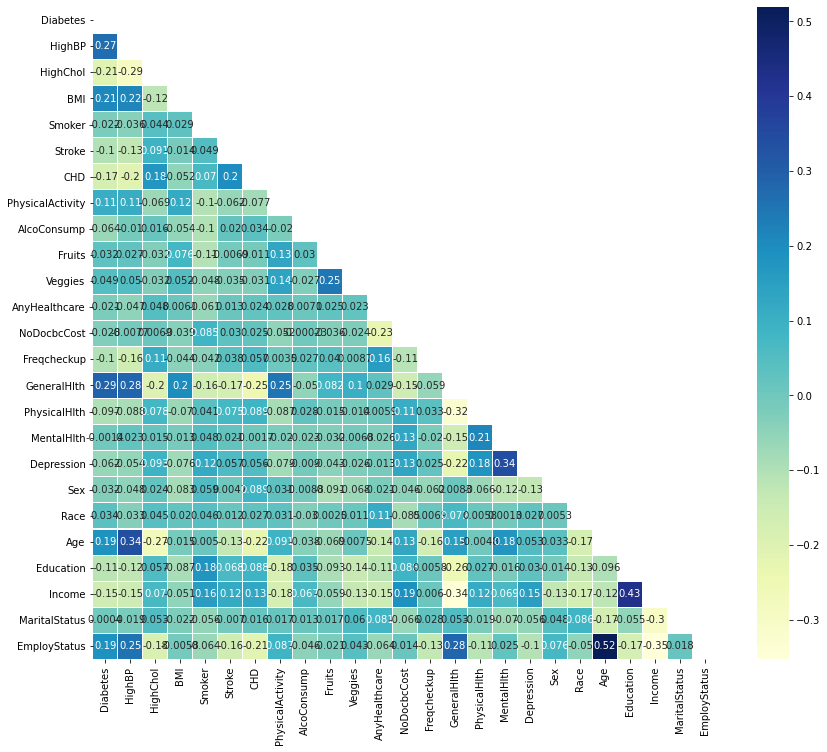

In [97]:
mask = np.triu(np.ones_like(df_cleaned1.corr(), dtype=bool))
plt.figure(figsize=(14, 12))

sns.heatmap(df_cleaned1.corr(), mask=mask, linewidths=.1, cmap="YlGnBu", annot=True)

plt.yticks(rotation=0)
plt.show()

In [98]:
corr = df_cleaned1.corr().abs()
corr_upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool)) #removing duplicates 

In [99]:
#to find the position indexes of variables with correlation more than 0.7 (variables with correlation above 0.7 are considered to have strong correlation)
row_position, col_position = np.where((corr_upper > 0.9))

for row, col in zip(row_position, col_position):
    print({row}, {col})

No highly correlated variables, so no need to remove any. 

##### Section 6: Visualizing the Target Variable

In [102]:
df = df_cleaned1

In [103]:
df["Diabetes"].value_counts()

0.0    194222
2.0     34582
1.0      4548
Name: Diabetes, dtype: int64

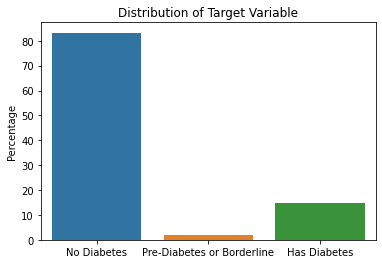

In [104]:
# Calculate the percentage of each category in the "Diabetes" column
percentage_data = df['Diabetes'].value_counts(normalize=True) * 100

# Create a bar plot with percentages
ax = sns.barplot(x=percentage_data.index, y=percentage_data.values)

# Set the custom x-axis tick labels
plt.xticks(ticks=range(len(percentage_data.index)), labels=["No Diabetes", "Pre-Diabetes or Borderline", "Has Diabetes"])

# Set the y-axis label
plt.ylabel("Percentage")
plt.title('Distribution of Target Variable')

# Show the plot
plt.show()

##### Section 7: Visualizing the Predictor Variables

A) Visualizing Target Variable and High BP

In [105]:
diabetes_bp = df.groupby(['Diabetes', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes  HighBP   Count
0       0.0     1.0  119468
1       0.0     2.0   74754
2       1.0     1.0    1683
3       1.0     2.0    2865
4       2.0     1.0    8570
5       2.0     2.0   26012


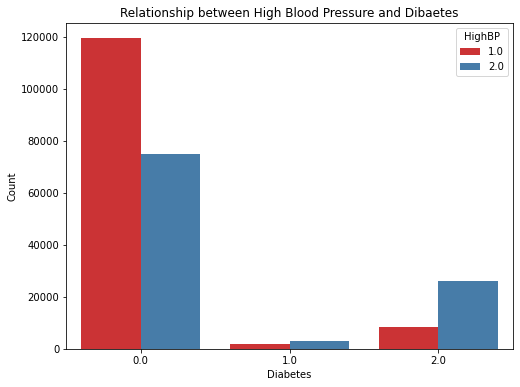

In [106]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'HighBP', data = diabetes_bp, palette = 'Set1')
plt.title("Relationship between High Blood Pressure and Dibaetes")
plt.show()

B) Visualizing Target Variable and General Health

In [107]:
diabetes_genhlth = df.groupby(['Diabetes', 'GeneralHlth']).size().reset_index(name = 'Count')
print(diabetes_genhlth)

    Diabetes  GeneralHlth  Count
0        0.0          1.0  36071
1        0.0          2.0  72318
2        0.0          3.0  58331
3        0.0          4.0  20486
4        0.0          5.0   7016
5        1.0          1.0    306
6        1.0          2.0   1191
7        1.0          3.0   1692
8        1.0          4.0   1012
9        1.0          5.0    347
10       2.0          1.0   1115
11       2.0          2.0   6188
12       2.0          3.0  13168
13       2.0          4.0   9636
14       2.0          5.0   4475


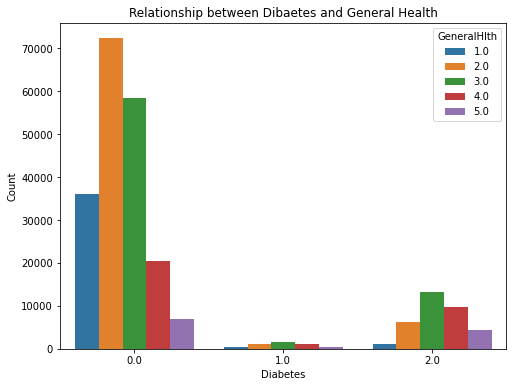

In [108]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'GeneralHlth', data = diabetes_genhlth)
plt.title("Relationship between Dibaetes and General Health")
plt.show() 
# General Health is ranked on a scale from 1 - 5, with 1 being excellent and 5 being poor.

C) Visualizing Target Variable and High Cholesterol

In [109]:
diabetes_chol = df.groupby(['Diabetes', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_chol)

   Diabetes  HighChol   Count
0       0.0       1.0   75286
1       0.0       2.0  118936
2       1.0       1.0    2828
3       1.0       2.0    1720
4       2.0       1.0   23156
5       2.0       2.0   11426


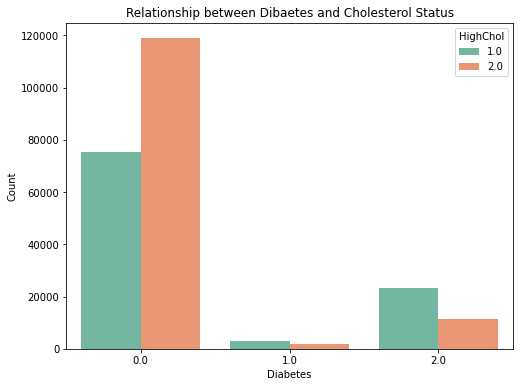

In [110]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'HighChol', data = diabetes_chol, palette = 'Set2')
plt.title("Relationship between Dibaetes and Cholesterol Status")
plt.show()

D) Visualizing Target Variable and BMI

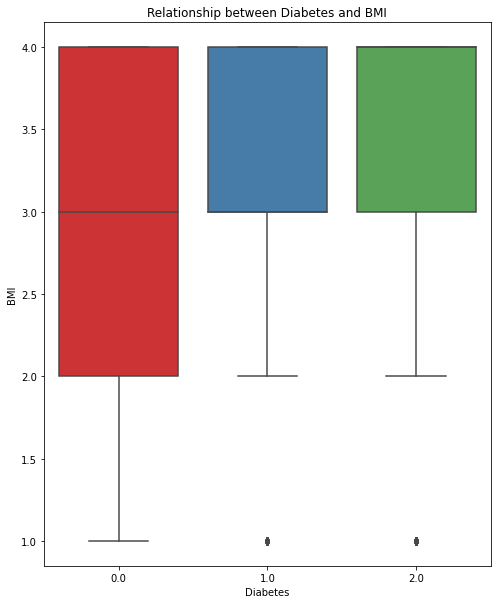

In [111]:
plt.figure(figsize = (8,10))
sns.boxplot(data = df, x = 'Diabetes', y = 'BMI', palette = 'Set1')
plt.title("Relationship between Diabetes and BMI")
plt.show()

E) Visualizing Target Variable and Age

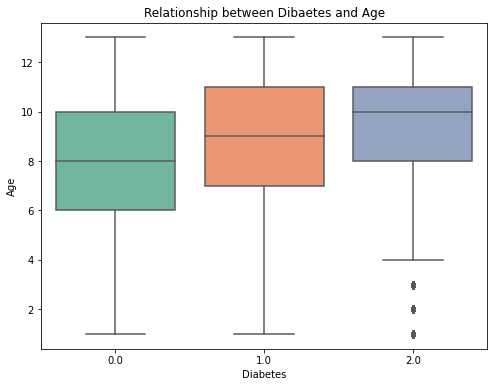

In [112]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes', y = 'Age', palette = 'Set2')
plt.title("Relationship between Dibaetes and Age")
plt.show()

##### Section 7: Data Preprocessing: Splitting and Standardizing

In [10]:
# Selecting features (independent variables) and target (dependent variable)
features = df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'CHD',
       'PhysicalActivity', 'AlcoConsump', 'Fruits', 'Veggies', 'AnyHealthcare',
       'NoDocbcCost', 'Freqcheckup', 'GeneralHlth', 'PhysicalHlth',
       'MentalHlth', 'Depression', 'Sex', 'Race', 'Age', 'Education', 'Income',
       'MaritalStatus', 'EmployStatus']]
target = df['Diabetes']

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Section 8: Machine Learning Experiments: Simple Models

##### 8.1 Logistic Regression (No Penalty)

In [12]:
from sklearn.linear_model import LogisticRegression

#logistic regression model lbfgs with default parameters
lr = LogisticRegression(random_state=42, multi_class='ovr')

In [13]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]

}

#grid search for logistic regression
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

#performing the grid search on the training data
grid_search_lr.fit(X_train, y_train)

#best parameters
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best Parameters for Logistic Regression: {'C': 10}


In [14]:
from sklearn.metrics import f1_score
grid_search_lr_params = grid_search_lr.best_params_

#best logistic regression model
best_logistic_model_lr = grid_search_lr.best_estimator_

#evaluating the model on the test set
y_pred_lr = best_logistic_model_lr.predict(X_test)

#F1 score on the test set
f1_test_lr = f1_score(y_test, y_pred_lr, average="weighted")
print("F1 Score on Test Set (Logistic Regression):", f1_test_lr)

F1 Score on Test Set (Logistic Regression): 0.7945642855703148


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

resultlr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(resultlr)
result1lr = classification_report(y_test, y_pred_lr)
print("Classification Report:",)
print (result1lr)
result2lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy:",result2lr)

Confusion Matrix:
[[37804     0  1012]
 [  835     0    97]
 [ 5723     0  1200]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.52      0.17      0.26      6923

    accuracy                           0.84     46671
   macro avg       0.46      0.38      0.39     46671
weighted avg       0.79      0.84      0.79     46671

Accuracy: 0.8357223972059737


##### 8.2 Logistic Regression (L1 Penalty)

In [16]:
#logistic regression model with L1 penalty
logistic_regression_l1 = LogisticRegression(penalty='l1', random_state=10, multi_class='ovr')

In [17]:
#parameters for grid search with L1 penalty
param_grid_l1 = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

#grid search for logistic regression with L1 penalty
grid_search_l1 = GridSearchCV(
    estimator=logistic_regression_l1,
    param_grid=param_grid_l1,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

#performing the grid search on the training data
grid_search_l1.fit(X_train, y_train)

#best parameters for L1 penalty
print("Best Parameters for Logistic Regression with L1 Penalty:", grid_search_l1.best_params_)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linea

Best Parameters for Logistic Regression with L1 Penalty: {'C': 10, 'solver': 'liblinear'}


In [18]:
grid_search_l1_params = grid_search_l1.best_params_

#best logistic regression model with L1 penalty
best_logistic_model_l1 = grid_search_l1.best_estimator_

#evaluating the model on the test set
y_pred_l1 = best_logistic_model_l1.predict(X_test)

#F1 score on the test set
f1_test_l1 = f1_score(y_test, y_pred_l1, average="weighted")
print("F1 Score on Test Set (Logistic Regression with L1 Penalty):", f1_test_l1)

F1 Score on Test Set (Logistic Regression with L1 Penalty): 0.7972301453069179


In [19]:
resultl1 = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix:")
print(resultl1)
result1l1 = classification_report(y_test, y_pred_l1)
print("Classification Report:",)
print (result1l1)
result2l1 = accuracy_score(y_test,y_pred_l1)
print("Accuracy:",result2l1)

Confusion Matrix:
[[37798     0  1018]
 [  836     0    96]
 [ 5648     0  1275]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.53      0.18      0.27      6923

    accuracy                           0.84     46671
   macro avg       0.46      0.39      0.39     46671
weighted avg       0.79      0.84      0.80     46671

Accuracy: 0.8372008313513745


##### 8.3 Logistic Regression (L2 Penalty)

In [15]:
#logistic regression model with L2 penalty
logistic_regression_l2 = LogisticRegression(penalty='l2', random_state=10, multi_class='ovr')

In [16]:
#parameters for grid search with L2 penalty
param_grid_l2 = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

#grid search for logistic regression with L2 penalty
grid_search_l2 = GridSearchCV(
    estimator=logistic_regression_l2,
    param_grid=param_grid_l2,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

#performing the grid search on the training data
grid_search_l2.fit(X_train, y_train)

#best parameters for L2 penalty
print("Best Parameters for Logistic Regression with L2 Penalty:", grid_search_l2.best_params_)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best Parameters for Logistic Regression with L2 Penalty: {'C': 10, 'solver': 'newton-cg'}


In [17]:
grid_search_l2_params = grid_search_l2.best_params_

#best logistic regression model with L2 penalty
best_logistic_model_l2 = grid_search_l2.best_estimator_

#evaluating the model on the test set
y_pred_l2 = best_logistic_model_l2.predict(X_test)

#F1 score on the test set
f1_test_l2 = f1_score(y_test, y_pred_l2, average="weighted")
print("F1 Score on Test Set (Logistic Regression with L2 Penalty):", f1_test_l2)

F1 Score on Test Set (Logistic Regression with L2 Penalty): 0.7969450092627258


In [18]:
resultl2 = confusion_matrix(y_test, y_pred_l2)
print("Confusion Matrix:")
print(resultl2)
result1l2 = classification_report(y_test, y_pred_l2)
print("Classification Report:",)
print (result1l2)
result2l2 = accuracy_score(y_test,y_pred_l2)
print("Accuracy:",result2l2)

Confusion Matrix:
[[37791     0  1025]
 [  835     0    97]
 [ 5653     0  1270]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.53      0.18      0.27      6923

    accuracy                           0.84     46671
   macro avg       0.46      0.39      0.39     46671
weighted avg       0.79      0.84      0.80     46671

Accuracy: 0.8369437123695657


##### 8.4 Logistic Regression (Elastic Net Penalty)

In [19]:
#logistic regression model with Elastic Net penalty
logistic_regression_elasticnet = LogisticRegression(penalty='elasticnet', random_state=10, multi_class='ovr')

In [20]:
#parameters for grid search with Elastic Net penalty
param_grid_elasticnet = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

#grid search for logistic regression with Elastic Net penalty
grid_search_elasticnet = GridSearchCV(
    estimator=logistic_regression_elasticnet,
    param_grid=param_grid_elasticnet,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

#performing the grid search on the training data
grid_search_elasticnet.fit(X_train, y_train)

#best parameters for Elastic Net penalty
print("Best Parameters for Logistic Regression with Elastic Net Penalty:", grid_search_elasticnet.best_params_)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linea

Best Parameters for Logistic Regression with Elastic Net Penalty: {'C': 10, 'l1_ratio': 0.25, 'solver': 'saga'}


In [21]:
grid_search_elasticnet_params = grid_search_elasticnet.best_params_

#best logistic regression model with Elastic Net penalty
best_logistic_model_elasticnet = grid_search_elasticnet.best_estimator_

#evaluating the model on the test set
y_pred_elasticnet = best_logistic_model_elasticnet.predict(X_test)

#F1 score on the test set
f1_test_elasticnet = f1_score(y_test, y_pred_elasticnet, average="weighted")
print("F1 Score on Test Set (Logistic Regression with Elastic Net Penalty):", f1_test_elasticnet)

F1 Score on Test Set (Logistic Regression with Elastic Net Penalty): 0.7966347112891192


In [22]:
resultelasticnet = confusion_matrix(y_test, y_pred_elasticnet)
print("Confusion Matrix:")
print(resultelasticnet)
result1elasticnet = classification_report(y_test, y_pred_elasticnet)
print("Classification Report:",)
print (result1elasticnet)
result2elasticnet = accuracy_score(y_test,y_pred_elasticnet)
print("Accuracy:",result2elasticnet)

Confusion Matrix:
[[37786     0  1030]
 [  838     0    94]
 [ 5659     0  1264]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.53      0.18      0.27      6923

    accuracy                           0.84     46671
   macro avg       0.46      0.39      0.39     46671
weighted avg       0.79      0.84      0.80     46671

Accuracy: 0.8367080199695742


##### 8.5 K-Nearest Neighbours (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#KNN classifier
knn_classifier = KNeighborsClassifier()

In [24]:
#parameters for grid search
knn_param_grid = {
    'n_neighbors': [3,5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

#grid search for KNN
knn_grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=knn_param_grid,
    cv=3,
    scoring='f1_weighted'
)

#performing the grid search on the training data
knn_grid_search.fit(X_train, y_train)

#best parameters
print("Best Parameters for KNN:", knn_grid_search.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [25]:
grid_search_knn_params = knn_grid_search.best_params_

#best KNN model
best_knn_model = knn_grid_search.best_estimator_

#evaluating the model on the test set
y_pred_knn = best_knn_model.predict(X_test)

#F1 score on the test set
f1_test_knn = f1_score(y_test, y_pred_knn, average="weighted")
print("F1 Score on Test Set (KNN):", f1_test_knn)

F1 Score on Test Set (KNN): 0.7864707242100542


In [26]:
result = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_knn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_knn)
print("Accuracy:",result2)

Confusion Matrix:
[[37004    27  1785]
 [  803     1   128]
 [ 5610    18  1295]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38816
         1.0       0.02      0.00      0.00       932
         2.0       0.40      0.19      0.26      6923

    accuracy                           0.82     46671
   macro avg       0.43      0.38      0.39     46671
weighted avg       0.77      0.82      0.79     46671

Accuracy: 0.8206380836065222


##### 8.6 Support Vector Classification (SVC) with decision_function_shape='ovr'

In [ ]:
from sklearn.svm import SVC

#SVM classifier
svm_classifier = SVC(decision_function_shape='ovr')

In [ ]:
#parameters for grid search
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
}

# Create grid search for SVM
svm_grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    cv=5,
    scoring='f1_weighted',
    #n_jobs=-1
)

# Perform the grid search on the training data
svm_grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for SVM:", svm_grid_search.best_params_)

In [ ]:
grid_search_svm_params = svm_grid_search.best_params_

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Print the F1 score on the test set
f1_test_svm = f1_score(y_test, y_pred_svm, average="weighted")
print("F1 Score on Test Set (SVM):", f1_test_svm)

setting max_iter=100 as the code takes way too long to run unless this is specified

In [23]:
from sklearn.svm import SVC

#SVM classifier
svm_classifier = SVC(max_iter=100, decision_function_shape='ovr')

In [24]:
#parameters for grid search
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
}

# Create grid search for SVM
svm_grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    cv=3,
    scoring='f1_weighted',
    #n_jobs=-1
)

# Perform the grid search on the training data
svm_grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for SVM:", svm_grid_search.best_params_)

Best Parameters for SVM: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}


In [25]:
grid_search_svm_params = svm_grid_search.best_params_

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Print the F1 score on the test set
f1_test_svm = f1_score(y_test, y_pred_svm, average="weighted")
print("F1 Score on Test Set (SVM):", f1_test_svm)

F1 Score on Test Set (SVM): 0.4635795729240228


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
resultsvm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(resultsvm)
result1svm = classification_report(y_test, y_pred_svm)
print("Classification Report:",)
print (result1svm)
result2svm = accuracy_score(y_test,y_pred_svm)
print("Accuracy:",result2svm)

Confusion Matrix:
[[14357 18362  6097]
 [  336   390   206]
 [ 2344  2792  1787]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.37      0.51     38816
         1.0       0.02      0.42      0.03       932
         2.0       0.22      0.26      0.24      6923

    accuracy                           0.35     46671
   macro avg       0.36      0.35      0.26     46671
weighted avg       0.73      0.35      0.46     46671

Accuracy: 0.3542671037689357


##### Section 9: Performing PCA on Simple Models

##### 9.1 Logistic Regression (No Penalty)

In [21]:
from sklearn.decomposition import PCA

#PCA with 95% explained variance
pca_lr = PCA(n_components=0.95) 
features_pca_lr = pca_lr.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train_pca_lr, X_test_pca_lr, y_train_lr, y_test_lr = train_test_split(features_pca_lr, target, test_size=0.2, random_state=42)

# Define logistic regression model
lr = LogisticRegression(random_state=42, multi_class='ovr')

# Define parameters for grid search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]
}

# Create grid search
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

# Perform the grid search on the training data
grid_search_lr.fit(X_train_pca_lr, y_train_lr)

#best parameters
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


grid_search_lr_params = grid_search_lr.best_params_

#best logistic regression model
best_logistic_model_lr = grid_search_lr.best_estimator_

#evaluating the model on the test set
y_pred_lr = best_logistic_model_lr.predict(X_test_pca_lr)

#F1 score on test set
f1_test_lr = f1_score(y_test_lr, y_pred_lr, average="weighted")
print("F1 Score on Test Set (Logistic Regression):", f1_test_lr)


result_lr = confusion_matrix(y_test_lr, y_pred_lr)
print("Confusion Matrix:")
print(result_lr)
result1_lr = classification_report(y_test_lr, y_pred_lr)
print("Classification Report:")
print(result1_lr)
result2_lr = accuracy_score(y_test_lr, y_pred_lr)
print("Accuracy:", result2_lr)


Best Parameters for Logistic Regression: {'C': 0.01}
F1 Score on Test Set (Logistic Regression): 0.7552737155445882
Confusion Matrix:
[[38816     0     0]
 [  932     0     0]
 [ 6923     0     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.00      0.00      0.00      6923

    accuracy                           0.83     46671
   macro avg       0.28      0.33      0.30     46671
weighted avg       0.69      0.83      0.76     46671

Accuracy: 0.831694199824302


##### 9.2 Logistic Regression (L1 Penalty)

In [22]:
#PCA with 95% explained variance
pca_l1 = PCA(n_components=0.95) 
features_pca_l1 = pca_l1.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train_pca_l1, X_test_pca_l1, y_train_l1, y_test_l1 = train_test_split(features_pca_l1, target, test_size=0.2, random_state=42)

#Logistic regression model with L1 penalty
logistic_regression_l1 = LogisticRegression(penalty='l1', random_state=10, multi_class='ovr')

# Parameters for grid search with L1 penalty
param_grid_l1 = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Grid search for logistic regression with L1 penalty
grid_search_l1 = GridSearchCV(
    estimator=logistic_regression_l1,
    param_grid=param_grid_l1,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

# Performing the grid search on the training data
grid_search_l1.fit(X_train_pca_l1, y_train_l1)

# best parameters for L1 penalty
print("Best Parameters for Logistic Regression with L1 Penalty and PCA:", grid_search_l1.best_params_)

grid_search_l1_params = grid_search_l1.best_params_

# best logistic regression model with L1 penalty
best_logistic_model_l1 = grid_search_l1.best_estimator_

# Evaluate the model on the test set
y_pred_l1 = best_logistic_model_l1.predict(X_test_pca_l1)

# F1 score on test set
f1_test_l1 = f1_score(y_test_l1, y_pred_l1, average="weighted")
print("F1 Score on Test Set (Logistic Regression with L1 Penalty and PCA):", f1_test_l1)

# Additional evaluation metrics for L1 penalty
result_l1 = confusion_matrix(y_test_l1, y_pred_l1)
print("Confusion Matrix:")
print(result_l1)
result1_l1 = classification_report(y_test_l1, y_pred_l1)
print("Classification Report:")
print(result1_l1)
result2_l1 = accuracy_score(y_test_l1, y_pred_l1)
print("Accuracy:", result2_l1)


Best Parameters for Logistic Regression with L1 Penalty and PCA: {'C': 0.01, 'solver': 'liblinear'}
F1 Score on Test Set (Logistic Regression with L1 Penalty and PCA): 0.7552737155445882
Confusion Matrix:
[[38816     0     0]
 [  932     0     0]
 [ 6923     0     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     38816
         1.0       0.00      0.00      0.00       932
         2.0       0.00      0.00      0.00      6923

    accuracy                           0.83     46671
   macro avg       0.28      0.33      0.30     46671
weighted avg       0.69      0.83      0.76     46671

Accuracy: 0.831694199824302


##### Section 10: Ensemble Models


##### 10.1 Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score 

#doing f1 because f1 is better than accuracy for imbalanced datasets (if you do accuracy on an imbalanced dataset, 
#if a class with a greater majority is always predicted, regardless of it is correct, the accuracy would still be high, 
#since it is a majority)

#define random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#create grid search, but scoring with f1_weighted since class 0 has a lot more values
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

#perform the grid search on the training data
grid_search.fit(X_train, y_train)

#print best_parameters
print("Best Parameters:", grid_search.best_params_)

#save best params
grid_search_rf_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average = "weighted")
print("F1 Score on Test Set:", f1_test)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
F1 Score on Test Set: 0.7940870965929047


##### 10.2 XGBoost

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

#define XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

#define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],  # XGBoost uses maximum depth instead of max_depth
    'min_child_weight': [1, 3, 5],  # XGBoost parameter for minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

#create grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

#perform the grid search on the training data
grid_search.fit(X_train, y_train)

#print best_parameters
print("Best Parameters:", grid_search.best_params_)

#save best params
grid_search_xgb_params = grid_search.best_params_

best_xgb_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_xgb_model.predict(X_test)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average = "weighted")
print("F1 Score on Test Set:", f1_test)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
F1 Score on Test Set: 0.8011234457651352


##### 10.3 Stacking Classifier with L1 as base and L2 as meta for logistic regression (introduce sparsity and then deal with multicollinearity)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

#base models with L1 regularization
base_models = [
    ('l1', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, multi_class='ovr'))
]

#meta-model with L2 regularization
meta_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

#stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

#train the stacking classifier
stacking_classifier.fit(X_train, y_train)

#make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score: {f1}')


Weighted F1 Score: 0.7996728639674674


##### 10.4 Stacking Classifier with L2 as base and L1 as meta for logistic regression (deal with multicollinearity, and then introduce sparsity)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

#base models with L2 regularization
base_models = [
    ('l2', LogisticRegression(penalty='l2', solver='liblinear', random_state=42, multi_class='ovr'))
]

#meta-model with L2 regularization
meta_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

#stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

#train the stacking classifier
stacking_classifier.fit(X_train, y_train)

#make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score: {f1}')


Weighted F1 Score: 0.7994842956389582


##### 10.5 Stacking with Random Forest as base and XGBoost as meta

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier


# Base models with Random Forest
base_models = [
    ('rf', RandomForestClassifier(random_state=42))
]

# Meta-model with XGBoost
meta_model = XGBClassifier(random_state=42)

# Stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Set up the parameter grid for grid search
param_grid = {
    'rf__n_estimators': [50, 100, 200], 
    'rf__max_depth': [None, 10, 20],  
    'final_estimator__n_estimators': [50, 100, 200], 
    'final_estimator__learning_rate': [0.01, 0.1, 0.2] 
}

# Perform grid search
grid_search = GridSearchCV(stacking_classifier, param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_stacking_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_stacking_classifier.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Best Weighted F1 Score: {f1}')
print('Best Parameters:', grid_search.best_params_)


Best Weighted F1 Score: 0.7982221563921161
Best Parameters: {'final_estimator__learning_rate': 0.2, 'final_estimator__n_estimators': 100, 'rf__max_depth': 10, 'rf__n_estimators': 100}


##### Section 11: Ensemble methods with PCA

##### 11.1 Run PCA on data

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality with a 95% threshold
pca = PCA(n_components=0.95)  # Retain 95% of the variance
features_pca = pca.fit_transform(features)

In [14]:
# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

##### 11.2 Random Forest with PCA

In [13]:
# Define random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create grid search, but scoring with f1_weighted since class 0 has a lot more values
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_pca, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Save best params
grid_search_rf_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test_pca)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average="weighted")
print("F1 Score on Test Set:", f1_test)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
F1 Score on Test Set: 0.7711099848984763


##### 11.3 XGBoost with PCA

In [15]:
#define XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

#define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],  # XGBoost uses maximum depth instead of max_depth
    'min_child_weight': [1, 3, 5],  # XGBoost parameter for minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

#create grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

#perform the grid search on the training data
grid_search.fit(X_train_pca, y_train)

#print best_parameters
print("Best Parameters:", grid_search.best_params_)

#save best params
grid_search_xgb_params = grid_search.best_params_

best_xgb_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_xgb_model.predict(X_test_pca)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average = "weighted")
print("F1 Score on Test Set:", f1_test)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
F1 Score on Test Set: 0.7575456935492603


##### 11.4 Stacking Classifier with L1 as base and L2 as meta for logistic regression (introduce sparsity and then deal with multicollinearity)

In [16]:
#base models with L1 regularization
base_models = [
    ('l1', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, multi_class='ovr'))
]

#meta-model with L2 regularization
meta_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

#stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

#train the stacking classifier
stacking_classifier.fit(X_train_pca, y_train)

#make predictions on the test set
y_pred = stacking_classifier.predict(X_test_pca)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score: {f1}')


Weighted F1 Score: 0.7552737155445882


##### 11.5 Stacking Classifier with L2 as base and L1 as meta for logistic regression (deal with multicollinearity and then introduce)

In [17]:
#base models with L2 regularization
base_models = [
    ('l2', LogisticRegression(penalty='l2', solver='liblinear', random_state=42, multi_class='ovr'))
]

#meta-model with L2 regularization
meta_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

#stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

#train the stacking classifier
stacking_classifier.fit(X_train_pca, y_train)

#make predictions on the test set
y_pred = stacking_classifier.predict(X_test_pca)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Weighted F1 Score: {f1}')


Weighted F1 Score: 0.7552737155445882


##### Section 12: More ensemble methods without PCA

##### 12.1 ADABoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

#define AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

#define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

#create grid search
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

#perform the grid search on the training data
grid_search.fit(X_train, y_train)

#print best_parameters
print("Best Parameters:", grid_search.best_params_)

#save best params
grid_search_adaboost_params = grid_search.best_params_

best_adaboost_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_adaboost_model.predict(X_test)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average="weighted")
print("F1 Score on Test Set:", f1_test)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
F1 Score on Test Set: 0.7982953915130202


##### 12.2 LGBM Classifier 

In [30]:
from lightgbm import LGBMClassifier

#define LightGBM classifier
lgb_classifier = LGBMClassifier(random_state=42)

#define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

#create grid search
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

#perform the grid search on the training data
grid_search.fit(X_train, y_train)

#print best_parameters
print("Best Parameters:", grid_search.best_params_)

#save best params
grid_search_lgb_params = grid_search.best_params_

best_lgb_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_lgb_model.predict(X_test)

# Print the F1 score on the test set
f1_test = f1_score(y_test, y_pred, average="weighted")
print("F1 Score on Test Set:", f1_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 149345, number of used features: 24
[LightGBM] [Info] Start training from score -0.183360
[LightGBM] [Info] Start training from score -3.943965
[LightGBM] [Info] Start training from score -1.909460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 149345, number of used features: 24
[LightGBM] [Info] Start training from score -0.183360
[LightGBM] [Info] Start training from score -3.943965
[LightGBM] [Info] Start training from score -1.909460
[LightGBM] [Info] Auto-choosing ro

##### 12.3 XGBoost stacked on LightGBM

In [40]:
# Define the base models with XGBoost
base_models = [
    ('xgb', XGBClassifier(random_state=42, colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8))
]

# Define the meta-model with LightGBM
meta_model = LGBMClassifier(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Define the parameter grid for LightGBM only
param_grid_lgbm = {
    'final_estimator__n_estimators': [100, 200],
    'final_estimator__learning_rate': [0.05, 0.1, 0.2],
}

# Create the grid search with the stacking classifier
grid_search = GridSearchCV(stacking_classifier, param_grid=param_grid_lgbm, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_stacking_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_stacking_classifier.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Best Weighted F1 Score: {f1}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 149344, number of used features: 3
[LightGBM] [Info] Start training from score -0.183361
[LightGBM] [Info] Start training from score -3.944304
[LightGBM] [Info] Start training from score -1.909409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 149345, number of used features: 3
[LightGBM] [Info] Start training from score -0.183360
[LightGBM] [Info] Start training from score -3.943965
[LightGBM] [Info] Start training from score -1.909460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001736 secon

##### Section 13: Feature Importance using the Best Model

In [113]:
from xgboost import XGBClassifier

xgb = XGBClassifier(colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8)
xgb.fit(X_train, y_train)

feature = pd.Series(xgb.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

HighBP              0.378443
GeneralHlth         0.109579
HighChol            0.067737
BMI                 0.059978
AlcoConsump         0.036990
Age                 0.029751
Freqcheckup         0.026617
CHD                 0.026324
EmployStatus        0.022796
Sex                 0.022285
Race                0.021346
Income              0.016411
PhysicalActivity    0.015946
Stroke              0.015682
MentalHlth          0.015530
Smoker              0.015296
PhysicalHlth        0.015293
MaritalStatus       0.015202
Fruits              0.015148
Education           0.015045
Depression          0.014776
NoDocbcCost         0.014667
Veggies             0.014628
AnyHealthcare       0.014528
dtype: float32


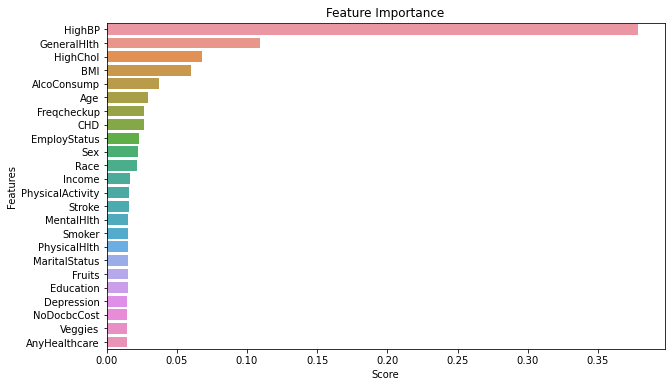

In [114]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()